In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout , Flatten


# import ready dataset
from keras.datasets import mnist

import os
from keras.preprocessing import image


# load and preprocess


In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
print(X_train[10].shape," " ,Y_train[10])

(28, 28)   3


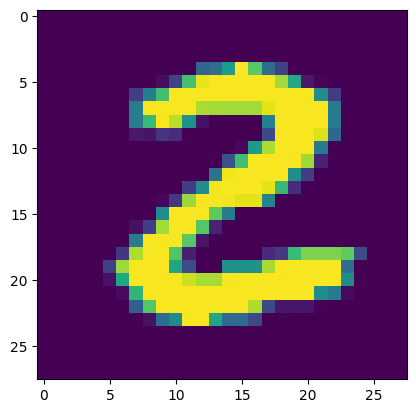

2


In [5]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

In [6]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [7]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [8]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# Building the Neural Network

In [9]:
"""# setting up the layers of the Neural  Network

model = tf.keras.models.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')])"""

"# setting up the layers of the Neural  Network\n\nmodel = tf.keras.models.Sequential([\n                          keras.layers.Flatten(input_shape=(28,28)),\n                          keras.layers.Dense(50, activation='relu'),\n                          keras.layers.Dense(50, activation='relu'),\n                          keras.layers.Dense(10, activation='softmax')])"

In [10]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(.25))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [11]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2702 - accuracy: 0.9176
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1337 - accuracy: 0.9599
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1041 - accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0837 - accuracy: 0.9741
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0737 - accuracy: 0.9771
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0657 - accuracy: 0.9790
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0598 - accuracy: 0.9808
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0534 - accuracy: 0.9835
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0507 - accuracy: 0.9839
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - lo

In [13]:
model.save('mnist.model')

# Accuracy on Test data:

In [14]:
model = tf.keras.models.load_model('mnist.model')

In [15]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)
print(loss)


313/313 [==============================] - 1s 2ms/step - loss: 0.0700 - accuracy: 0.9817
0.9817000031471252
0.06997349858283997


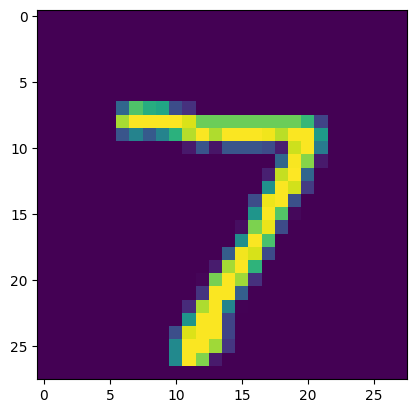

In [16]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [17]:
print(Y_test[0])

7


# build predictive model


In [21]:
! unzip /content/test_digit.zip

Archive:  /content/test_digit.zip
   creating: test digit/
  inflating: test digit/1.png        
  inflating: test digit/2.png        
  inflating: test digit/3.png        
  inflating: test digit/4.png        
  inflating: test digit/5.png        


In [27]:
img_number = 3
while os.path.isfile(f"/content/test_digit/{img_number}.png"): #f allow us to put varable within text
  try:
    img = cv2.imread(f"/content/test_digit/{img_number}.png")[ : , : , 0]
    img = cv2.resize(img, (28, 28))
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"this image is probably {np.argmax(prediction)}")  #argmax give us index of highest probably
    cv2_imshow(img[0])
  except:
    print("error")
  finally:
    img_number +=1

1/1 [==============================] - 0s 36ms/step
this image is probably 4


1/1 [==============================] - 0s 31ms/step
this image is probably 9


1/1 [==============================] - 0s 35ms/step
this image is probably 7


In [23]:
img = cv2.imread("/content/test digit/1.png")[ : , : , 0]
img = cv2.resize(img, (28, 28))
